# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_table("data/Train_UWu5bXk.txt", sep = ',')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Assumptions

1. Outlet in tier 1 should have higher sales
2. Large outlets should have higher sales
3. Items with more visibilty will be sold more
4. Older outlets have large customer base
5. Low fat items have more sales

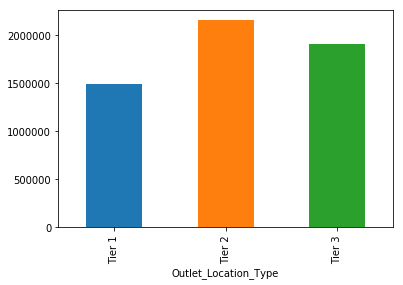

In [4]:
outlet_location_items_sales = train_data.groupby(['Outlet_Identifier', 'Outlet_Location_Type'])['Item_Outlet_Sales'].sum()
outlet_items_sales_df = pd.DataFrame(outlet_location_items_sales.reset_index())
# outlet_items_count_df = outlet_items_count_df.rename(columns = {0 : 'Count'})
outlet_items_sales_df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot(kind = 'bar')


Our assumption of outlets in **Tier 1** one have higher sales holds false. 

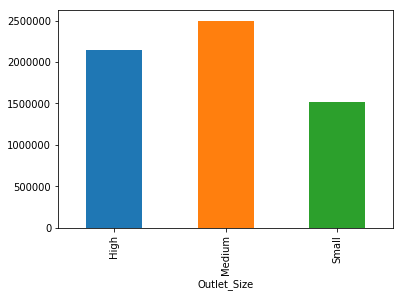

In [5]:
outlet_size_items_sales = train_data.groupby(['Outlet_Identifier', 'Outlet_Size'])['Item_Outlet_Sales'].sum()
outlet_size_sales_df = pd.DataFrame(outlet_size_items_sales.reset_index())
# outlet_items_count_df = outlet_items_count_df.rename(columns = {0 : 'Count'})
outlet_size_sales_df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().plot(kind = 'bar')

Our assumption of **High outlets** have higher sales holds false. 

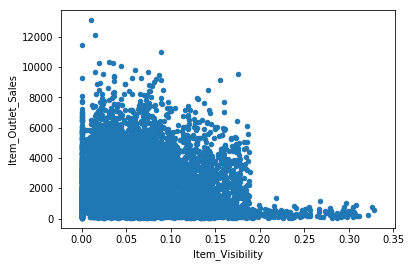

In [12]:
visibility_df = train_data[['Item_Visibility', 'Item_Outlet_Sales']].plot.scatter(x="Item_Visibility", y="Item_Outlet_Sales")
# import seaborn as sns; sns.set()
# ax = sns.scatterplot(x="Item_Visibility", y="Item_Outlet_Sales", data= visibility_df)

In [8]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(visibility_df['Item_Visibility'], visibility_df['Item_Outlet_Sales'])
corr

-0.12862461222077023

We can conclude that there is no relationship between Item visibility and sales

  Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales
0            OUT010                       1998       1.883402e+05
1            OUT013                       1987       2.142664e+06
2            OUT017                       2007       2.167465e+06
3            OUT018                       2009       1.851823e+06
4            OUT019                       1985       1.796941e+05
5            OUT027                       1985       3.453926e+06
6            OUT035                       2004       2.268123e+06
7            OUT045                       2002       2.036725e+06
8            OUT046                       1997       2.118395e+06
9            OUT049                       1999       2.183970e+06


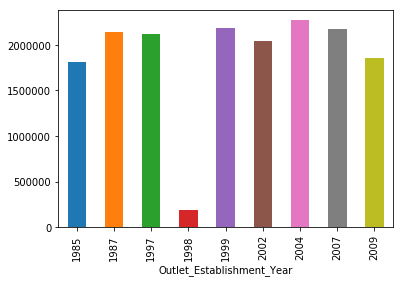

In [9]:
outlet_establishment_items_sales = train_data.groupby(['Outlet_Identifier', 'Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()
outlet_establishment_sales_df = pd.DataFrame(outlet_establishment_items_sales.reset_index())
print(outlet_establishment_sales_df)
outlet_establishment_sales_df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].mean().plot(kind = 'bar')

No evidence to prove that older outlet have higher sales

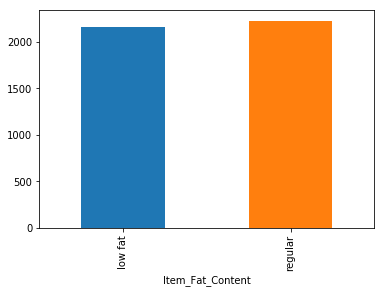

In [10]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].apply(lambda x : x.lower())
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['lf', 'reg'], ['low fat', 'regular'])
outlet_fat_content_items_sales = train_data.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].mean().plot(kind = 'bar')